In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import random
from shapely.geometry import Point, MultiPoint
pd.set_option('display.max_rows', 100)

In [49]:
sp_shp = gpd.read_file('C:/Users/Ricardo/Documents/R-Projetos/Exploratory-Data-Analysis-Bancarization/data/processed/sp_pop_shp/sp_pop_shp.shp')

In [3]:
sp_shp

,CLASSID,FEATID,REVISIONNU,NOME_DIST,SIGLA_DIST,COD_DIST,COD_SUB,DATA_CRIAC,USUARIO_ID,distrito_x,pop_maior_,distrito_y,pop_maio_1,geometry
0,4.0,8583485.0,1.0,JOSE BONIFACIO,JBO,47,27,2007-03-19,0.0,47,112070,47,102489,"POLYGON ((352436.869 7394174.148, 352450.740 7..."
1,4.0,8583484.0,1.0,JD SAO LUIS,JDS,46,18,2007-03-19,0.0,46,234998,46,215021,"POLYGON ((320696.639 7383620.282, 320699.486 7..."
2,4.0,8583445.0,1.0,ARTUR ALVIM,AAL,5,21,2007-03-19,0.0,5,82837,5,77007,"POLYGON ((349461.276 7397764.525, 349461.935 7..."
3,4.0,8583479.0,1.0,JAGUARA,JAG,40,08,2007-03-19,0.0,40,19980,40,18694,"POLYGON ((320731.080 7400614.592, 320732.386 7..."
4,4.0,8583437.0,1.0,VILA PRUDENTE,VPR,93,29,2007-03-19,0.0,93,88100,93,82721,"POLYGON ((338651.039 7392203.484, 338654.034 7..."
5,4.0,8583480.0,1.0,JAGUARE,JRE,41,08,2007-03-19,0.0,41,45185,41,41683,"POLYGON ((320606.161 7394439.116, 320608.927 7..."
6,4.0,8583481.0,1.0,JARAGUA,JAR,42,02,2007-03-19,0.0,42,169714,42,154212,"POLYGON ((320069.659 7407622.486, 320069.992 7..."
7,4.0,8583482.0,1.0,JD HELENA,JDH,44,23,2007-03-19,0.0,44,104992,44,95353,"POLYGON ((353421.390 7401397.366, 353420.401 7..."
8,4.0,8583483.0,1.0,JD PAULISTA,JDP,45,11,2007-03-19,0.0,45,78846,45,75767,"POLYGON ((329650.535 7390883.219, 329645.838 7..."
9,4.0,8583486.0,1.0,LAJEADO,LAJ,96,28,2007-03-19,0.0,96,136321,96,123505,"POLYGON ((354138.975 7396739.337, 354136.244 7..."


In [39]:
# Create an empty dataframe
pop_simulated = pd.DataFrame()

# For each district, generate a lat long based on pop
for index, row in sp_shp.iterrows():
    pointsx = []
    pointsy = []
    minx, miny, maxx, maxy = row["geometry"].bounds
    while len(pointsx) < row['pop_maio_1']*0.01:
        x = random.uniform(minx, maxx)
        y = random.uniform(miny, maxy)
        pnt = Point(x, y)
        if row["geometry"].contains(pnt):
            pointsx.append(x)
            pointsy.append(y)
    df = pd.DataFrame(
        {'x': pointsx, 'y': pointsy}
    ) 
    pop_simulated = pop_simulated.append(df)

In [40]:
pop_simulated

,x,y
0,353962.710883,7.395480e+06
1,352872.633666,7.395153e+06
2,353267.475656,7.395194e+06
3,353895.163047,7.394515e+06
4,353226.410239,7.392869e+06
...,...,...
496,332307.083495,7.395544e+06
497,332829.616921,7.394367e+06
498,332601.511219,7.394364e+06
499,332345.972841,7.394343e+06


In [41]:
gdf = gpd.GeoDataFrame(pop_simulated, geometry=gpd.points_from_xy(pop_simulated.x, pop_simulated.y), crs=sp_shp.crs)
print(gdf)

                 x             y                        geometry
0    353962.710883  7.395480e+06  POINT (353962.711 7395480.120)
1    352872.633666  7.395153e+06  POINT (352872.634 7395153.067)
2    353267.475656  7.395194e+06  POINT (353267.476 7395194.282)
3    353895.163047  7.394515e+06  POINT (353895.163 7394515.488)
4    353226.410239  7.392869e+06  POINT (353226.410 7392869.003)
..             ...           ...                             ...
496  332307.083495  7.395544e+06  POINT (332307.083 7395543.898)
497  332829.616921  7.394367e+06  POINT (332829.617 7394367.001)
498  332601.511219  7.394364e+06  POINT (332601.511 7394364.036)
499  332345.972841  7.394343e+06  POINT (332345.973 7394343.235)
500  332241.359736  7.394874e+06  POINT (332241.360 7394873.672)

[89258 rows x 3 columns]


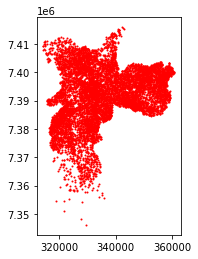

In [9]:
gdf.plot(marker='o', color='red', markersize=1);

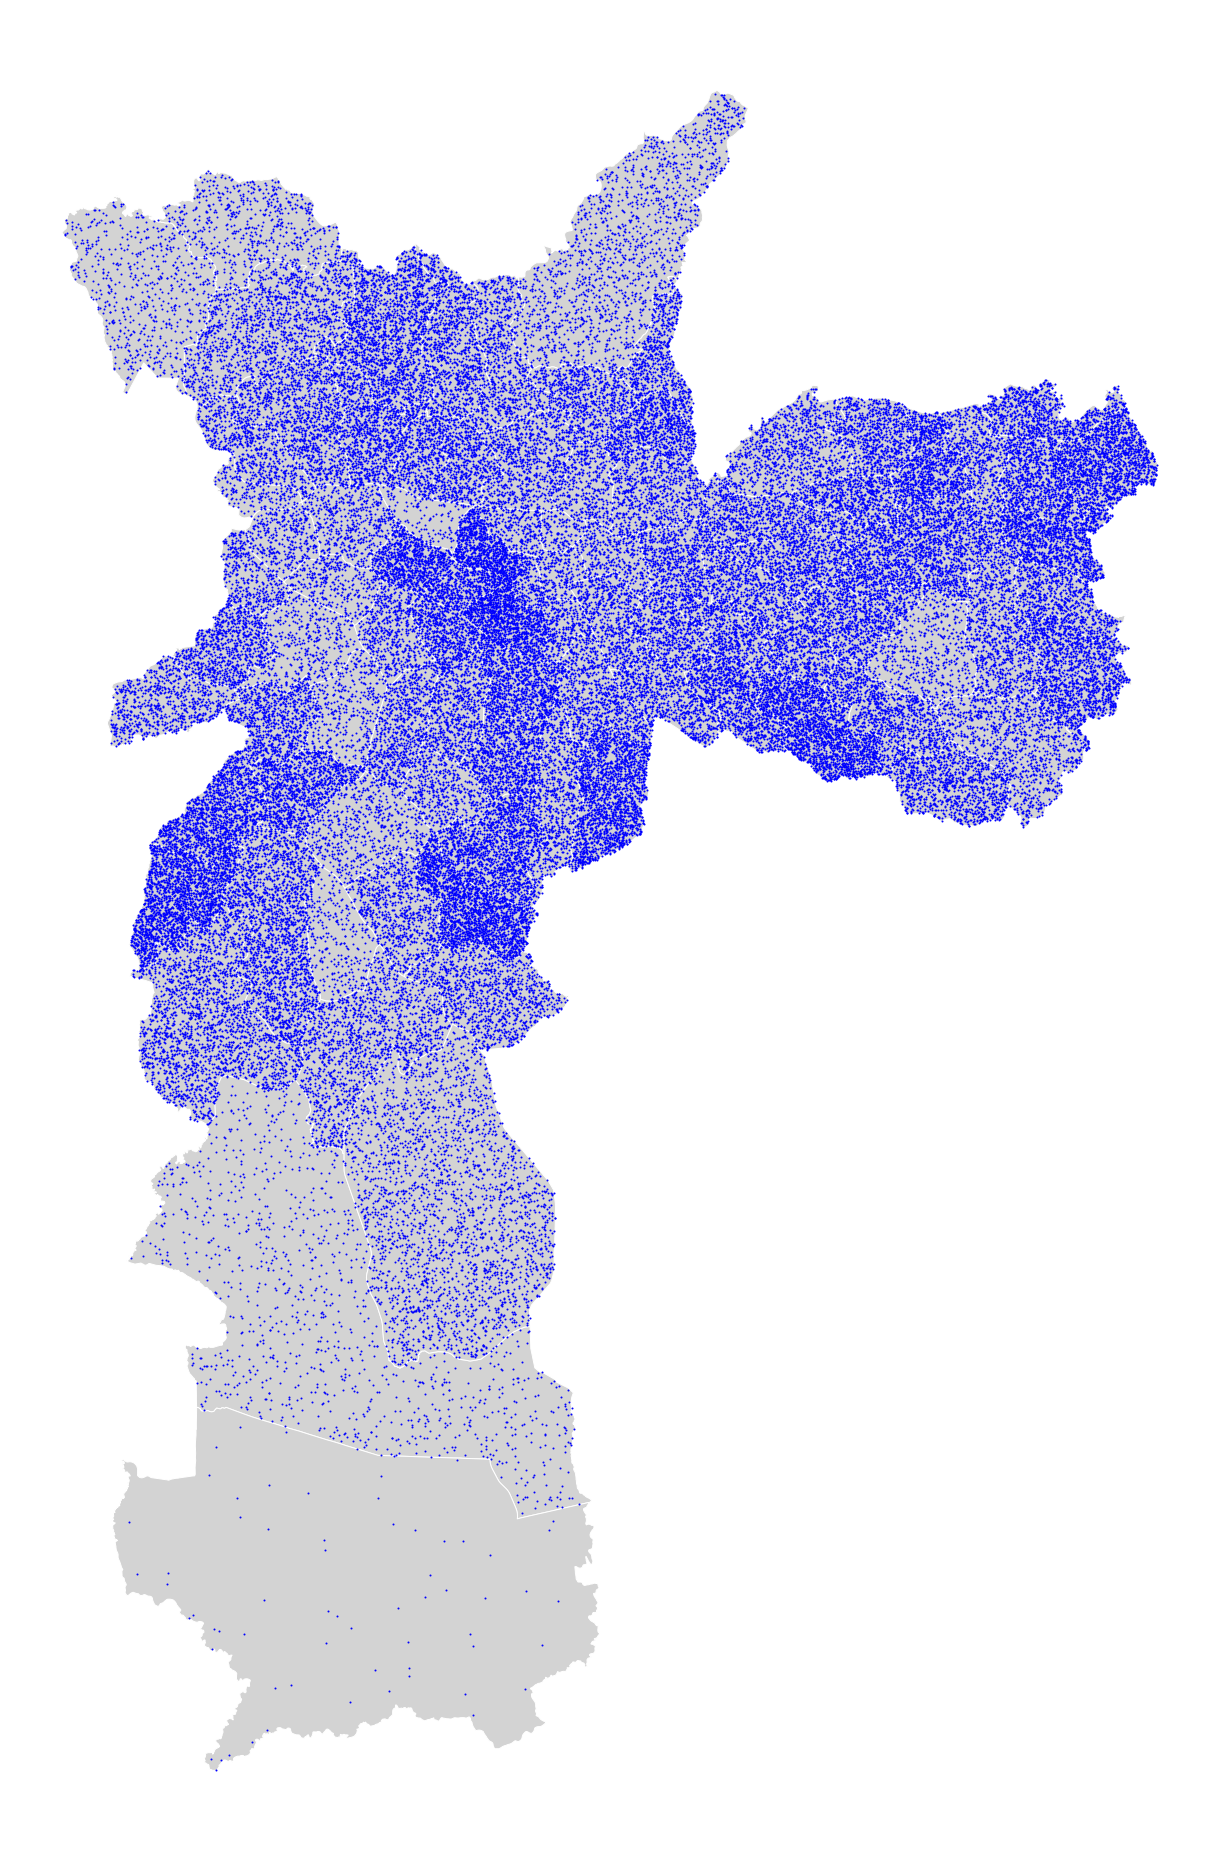

In [42]:
fig, ax = plt.subplots(figsize=(40,34))

# Set bg colors
ax.set(facecolor = "white")
fig.patch.set_facecolor('white')

# Plot polygons
sp_shp.plot(ax=ax, facecolor='lightgrey', edgecolor="white")

# Plot points
gdf.plot(ax=ax, color='blue', markersize=1)

ax.axis("off")
plt.show()

In [3]:
gdf_agencias_sp = pd.read_csv('C:/Users/Ricardo/Documents/R-Projetos/Exploratory-Data-Analysis-Bancarization/data/processed/agencias_latlong.csv', sep=';')

In [4]:
# Set crs to use degrees in the first moment
# https://gis.stackexchange.com/questions/345071/matching-x-and-y-axis-coordinates-of-two-geopandas-geometries-to-overlay-them
gdf_agencias_sp_points = gpd.GeoDataFrame(gdf_agencias_sp, geometry=gpd.points_from_xy(gdf_agencias_sp['lon'], gdf_agencias_sp['lat']), crs=4326)

In [5]:
sp_shp.crs

{'init': 'epsg:29193'}

In [6]:
# Then, set the crs of points to the crs of shapefile map which is in meters
gdf_agencias_sp_points = gdf_agencias_sp_points.to_crs(sp_shp.crs)

C:\Users\Ricardo\Anaconda3\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [12]:
within_sp = gdf_agencias_sp_points[gdf_agencias_sp_points.geometry.within(sp_shp.geometry.unary_union)]

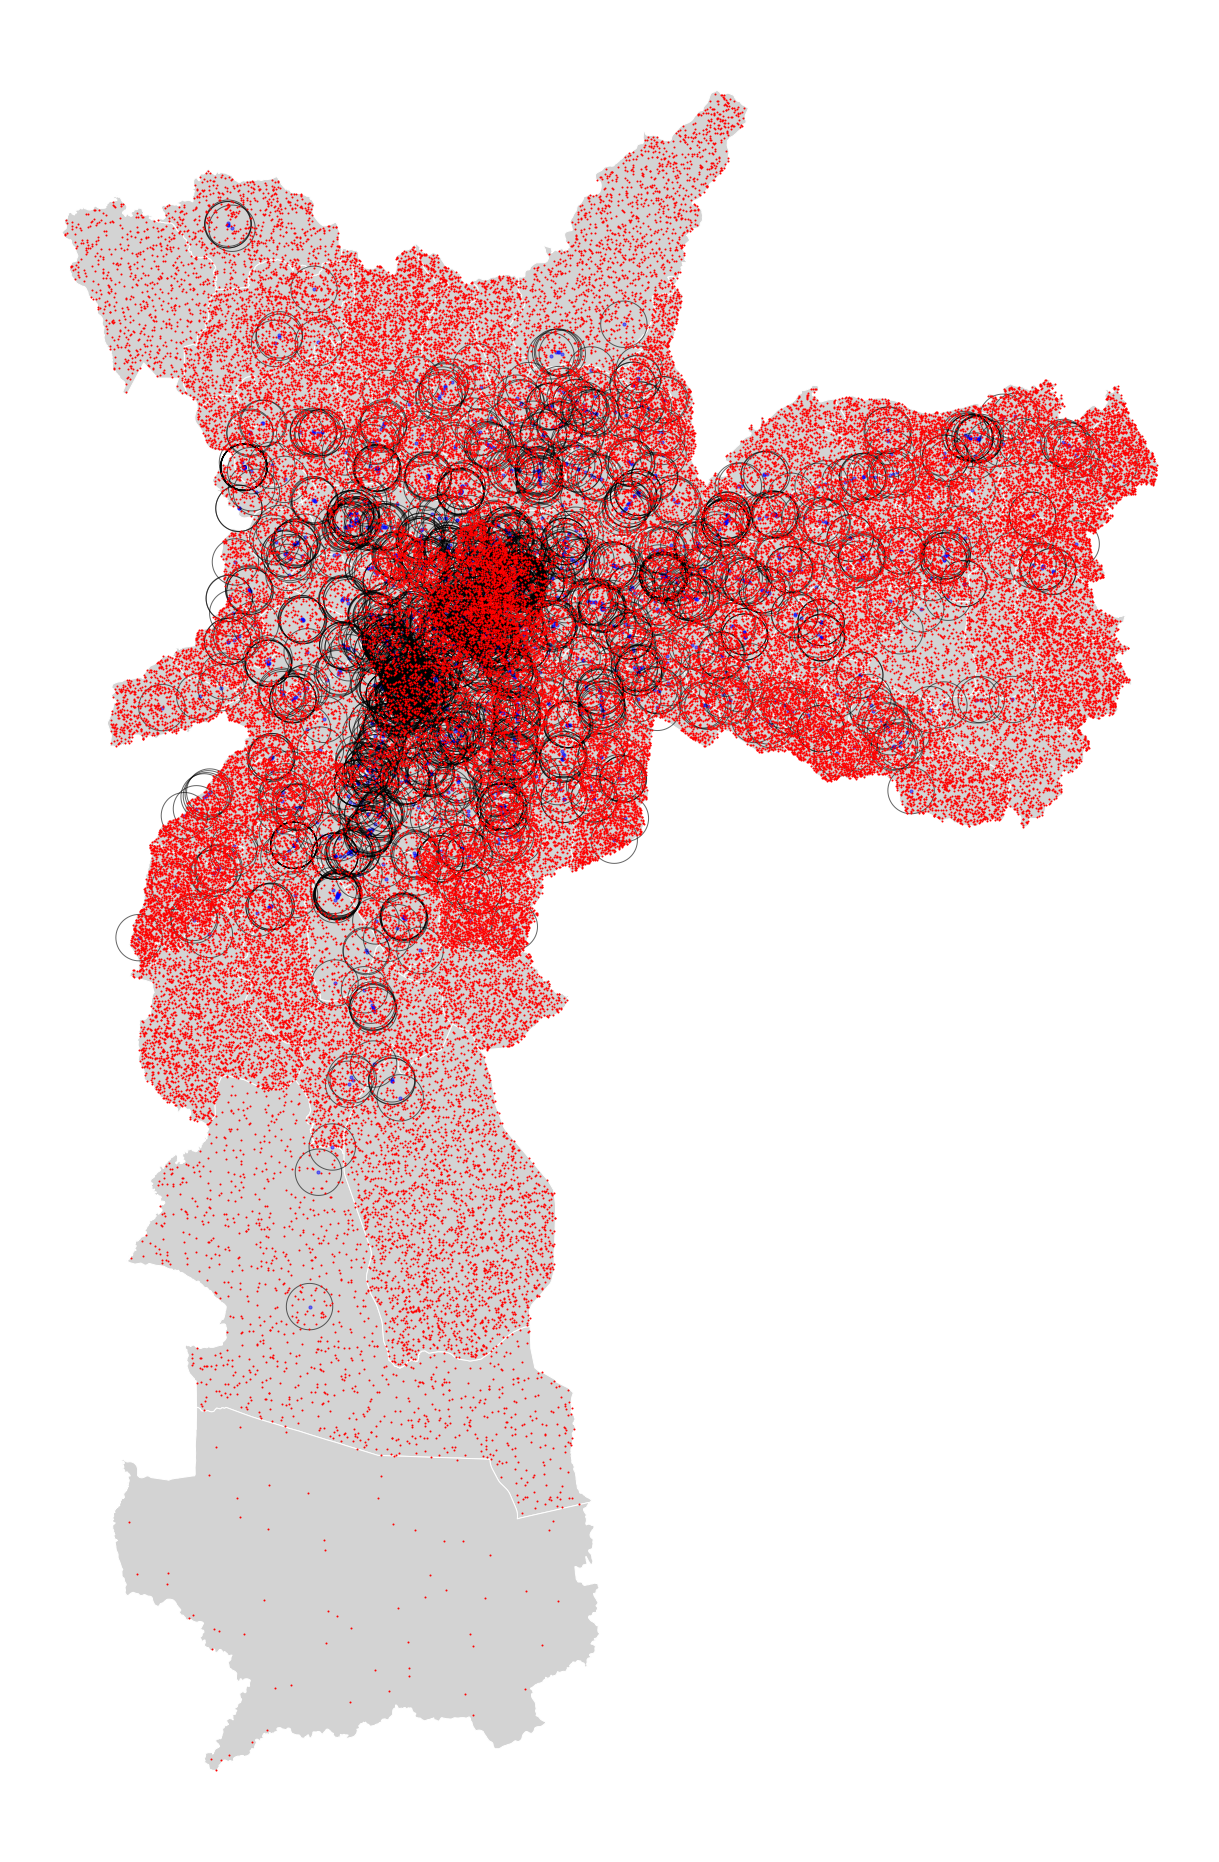

In [43]:
fig, ax = plt.subplots(figsize=(40,34))

# Set bg colors
ax.set(facecolor = "white")
fig.patch.set_facecolor('white')

# Plot polygons
sp_shp.plot(ax=ax, facecolor='lightgrey', edgecolor="white")

# Plot points
within_sp.plot(ax=ax, color='blue', markersize=10, alpha=0.5)
within_sp.geometry.buffer(1000).plot(ax=ax, alpha=0.6, edgecolor='black', facecolor='none')
gdf.plot(ax=ax, color='red', markersize=1)

ax.axis("off")
plt.show()

In [27]:
#within_sp.geometry.buffer(1000).unary_union
sp_shp.columns

Index(['CLASSID', 'FEATID', 'REVISIONNU', 'NOME_DIST', 'SIGLA_DIST',
       'COD_DIST', 'COD_SUB', 'DATA_CRIAC', 'USUARIO_ID', 'distrito_x',
       'pop_maior_', 'distrito_y', 'pop_maio_1', 'geometry'],
      dtype='object')

In [44]:
# Create an empty dataframe
result = pd.DataFrame()

for index, row in sp_shp.iterrows():
    # Getting pop inside district
    within_district = gdf[gdf.geometry.within(row.geometry)]
    
    # Getting agencies inside district
    within_agencies = within_sp[within_sp.geometry.within(row.geometry)]
    
    # Getting pop inside buffer
    within_pop = within_district[within_district.geometry.within(within_agencies.geometry.buffer(1000).unary_union)]
    #print(within_district.shape[0], within_pop.shape[0])

    df = pd.DataFrame(
        {'pop_total': within_district.shape[0], 'pop_buffer': within_pop.shape[0], 'nome_distrito':row.NOME_DIST, 'cod_distrito':row.COD_DIST}, index=[0]
    ) 
    result = result.append(df)
    

In [45]:
result['perc_atendimento'] = result.pop_buffer/result.pop_total

In [46]:
result

,pop_total,pop_buffer,nome_distrito,cod_distrito,perc_atendimento
0,1025,103,JOSE BONIFACIO,47,0.100488
0,2151,828,JD SAO LUIS,46,0.384937
0,771,358,ARTUR ALVIM,5,0.464332
0,187,113,JAGUARA,40,0.604278
0,828,722,VILA PRUDENTE,93,0.871981
0,417,307,JAGUARE,41,0.736211
0,1543,470,JARAGUA,42,0.304601
0,954,366,JD HELENA,44,0.383648
0,758,758,JD PAULISTA,45,1.000000
0,1236,356,LAJEADO,96,0.288026


In [47]:
sp_shp_agg = sp_shp.merge(result, how='left',left_on='COD_DIST', right_on='cod_distrito')

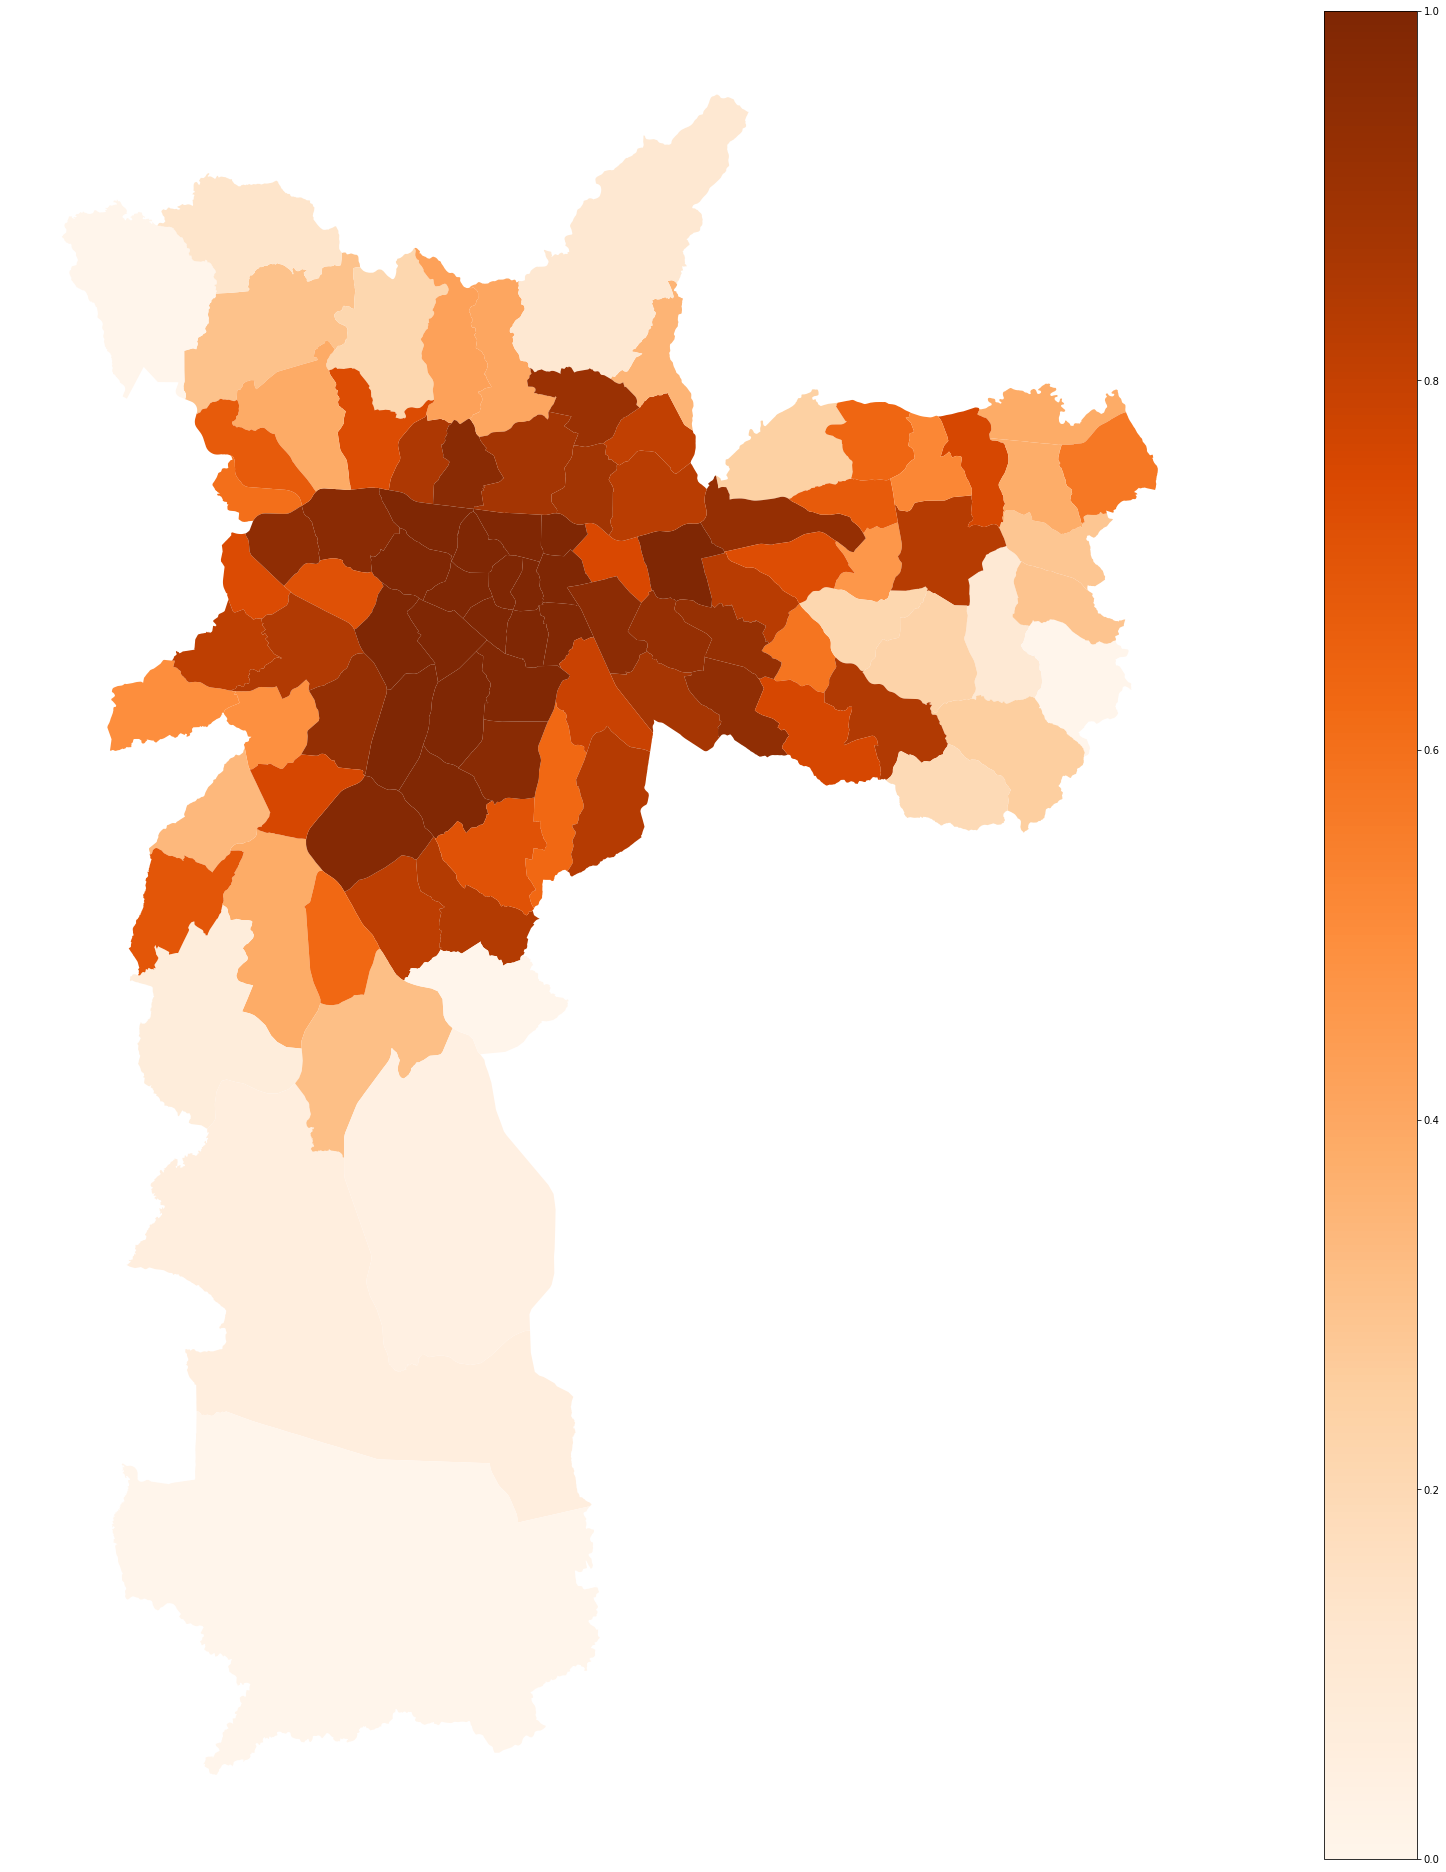

In [48]:
fig, ax = plt.subplots(figsize=(40,34))

# Set bg colors
ax.set(facecolor = "white")
fig.patch.set_facecolor('white')

# Plot
sp_shp_agg.plot(column='perc_atendimento', cmap="Oranges", legend=True, ax=ax)

ax.axis("off")
plt.show()

In [57]:
# Create an empty dataframe
result = pd.DataFrame()
    
for i in range(10):
    print(i)
    # Create an empty dataframe
    pop_simulated = pd.DataFrame()

    # For each district, generate a lat long based on pop
    for index, row in sp_shp.iterrows():
        pointsx = []
        pointsy = []
        minx, miny, maxx, maxy = row["geometry"].bounds
        while len(pointsx) < row['pop_maio_1']*0.001:
            x = random.uniform(minx, maxx)
            y = random.uniform(miny, maxy)
            pnt = Point(x, y)
            if row["geometry"].contains(pnt):
                pointsx.append(x)
                pointsy.append(y)
        df = pd.DataFrame(
            {'x': pointsx, 'y': pointsy}
        ) 
        pop_simulated = pop_simulated.append(df)

    gdf = gpd.GeoDataFrame(pop_simulated, geometry=gpd.points_from_xy(pop_simulated.x, pop_simulated.y), crs=sp_shp.crs)

    

    for index, row in sp_shp.iterrows():
        # Getting pop inside district
        within_district = gdf[gdf.geometry.within(row.geometry)]

        # Getting agencies inside district
        within_agencies = within_sp[within_sp.geometry.within(row.geometry)]

        # Getting pop inside buffer
        within_pop = within_district[within_district.geometry.within(within_agencies.geometry.buffer(1000).unary_union)]
        #print(within_district.shape[0], within_pop.shape[0])

        df = pd.DataFrame(
            {'simulacao': 'simulacao_'+str(i), 'pop_total': within_district.shape[0], 'pop_buffer': within_pop.shape[0], 'perc_atendimento': within_pop.shape[0]/within_district.shape[0], 'nome_distrito':row.NOME_DIST, 'cod_distrito':row.COD_DIST}, index=[0]
        ) 
        result = result.append(df)

0
1
2
3
4
5
6
7
8
9


In [59]:
result

,simulacao,pop_total,pop_buffer,perc_atendimento,nome_distrito,cod_distrito
0,simulacao_0,103,9,0.087379,JOSE BONIFACIO,47
0,simulacao_0,216,81,0.375000,JD SAO LUIS,46
0,simulacao_0,78,39,0.500000,ARTUR ALVIM,5
0,simulacao_0,19,8,0.421053,JAGUARA,40
0,simulacao_0,83,76,0.915663,VILA PRUDENTE,93
...,...,...,...,...,...,...
0,simulacao_9,85,69,0.811765,VILA MARIA,89
0,simulacao_9,110,109,0.990909,VILA MARIANA,90
0,simulacao_9,83,61,0.734940,VILA MATILDE,91
0,simulacao_9,72,72,1.000000,SANTA CECILIA,69


In [89]:
heatmap = result[['simulacao', 'perc_atendimento', 'nome_distrito']].pivot(index='nome_distrito', columns='simulacao')['perc_atendimento']
#df.pivot(index=df.index, columns='key')['val']

In [84]:
import seaborn as sns

<AxesSubplot:xlabel='simulacao', ylabel='nome_distrito'>

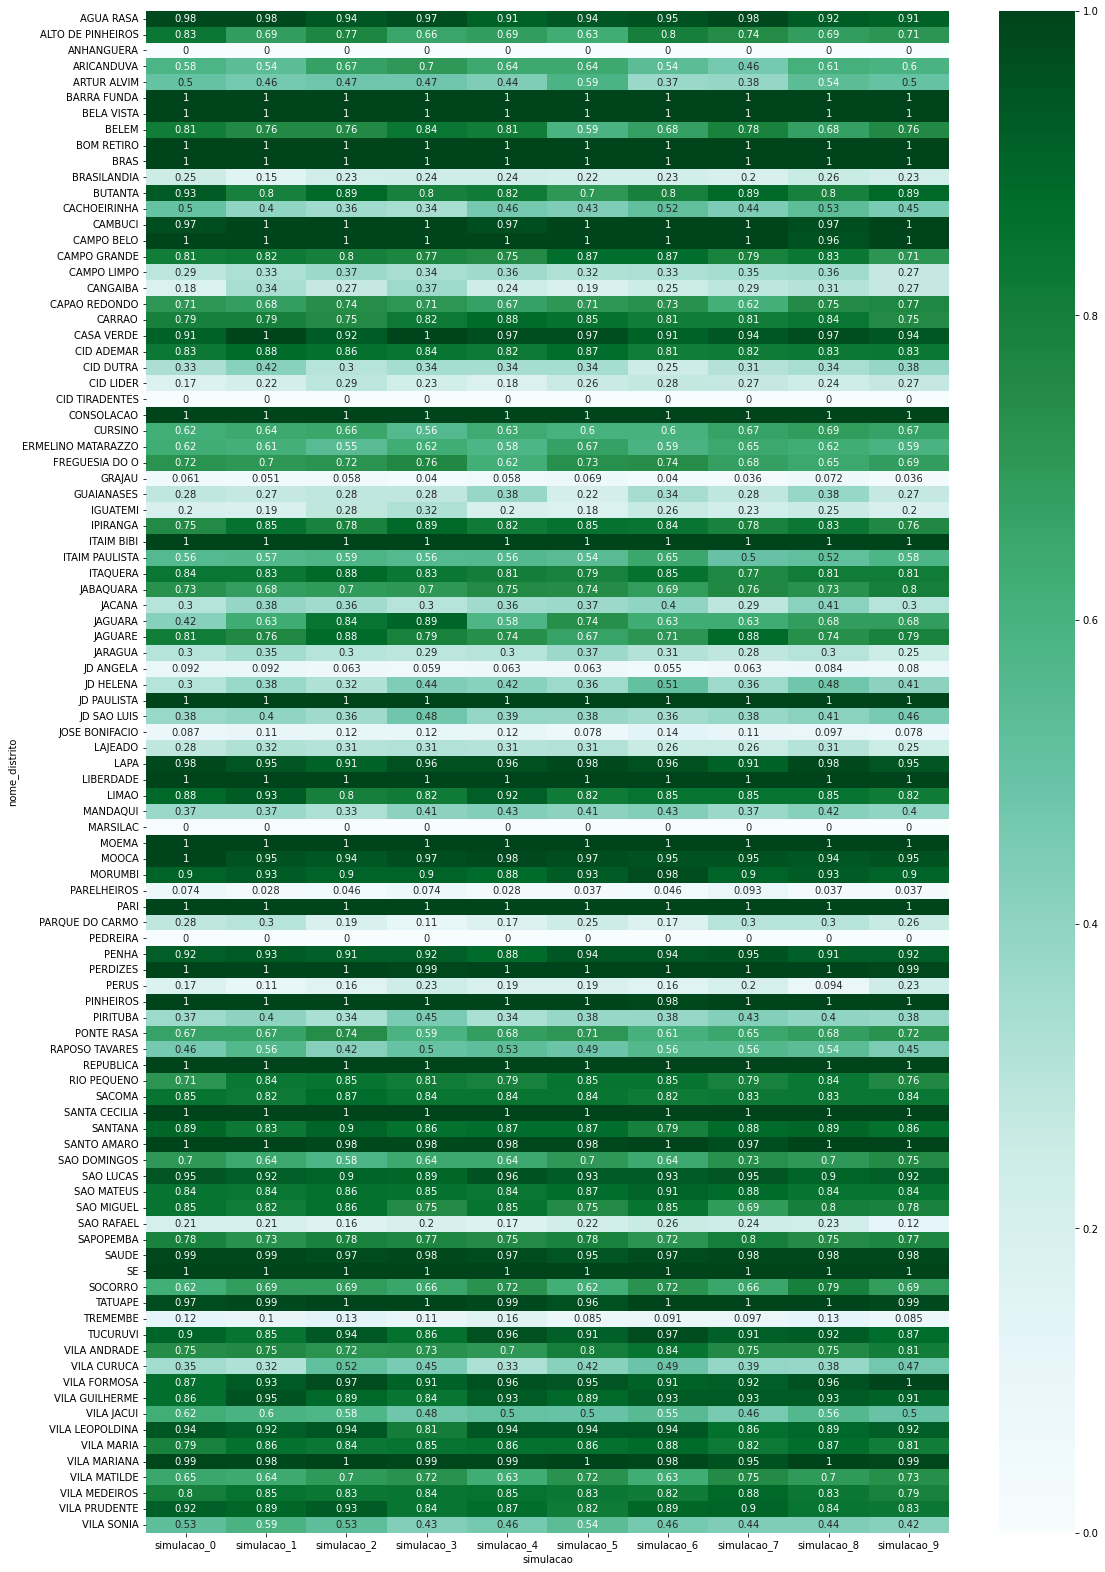

In [92]:
fig,ax = plt.subplots(1,1,figsize=(18,28))
sns.heatmap(heatmap, cmap="BuGn", annot=True, ax=ax)

In [83]:
!pip install seaborn